### Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Инструкция по выполнению проекта

#### Шаг 1. Откройте файл с данными и изучите общую информацию

Путь к файлу: /datasets/games.csv

#### Шаг 2. Подготовьте данные

* 		Замените названия столбцов (приведите к нижнему регистру);
* 		Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* 		Обработайте пропуски при необходимости:
    * 		Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * 		Опишите причины, которые могли привести к пропускам;
    * 		Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* 		Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### Шаг 3. Проведите исследовательский анализ данных

* 		Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* 		Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.Не учитывайте в работе данные за предыдущие годы.
* 		Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* 		Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* 		Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* 		Соотнесите выводы с продажами игр на других платформах.
* 		Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* 		Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* 		Самые популярные жанры (топ-5). Поясните разницу.
* 		Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Шаг 5. Проверьте гипотезы

* 		Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* 		Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* 		Как вы сформулировали нулевую и альтернативную гипотезы;
* 		Какой критерий применили для проверки гипотез и почему.

#### Шаг 6. Напишите общий вывод

### Описание данных

* 		`Name` — название игры
* 		`Platform` — платформа
* 		`Year_of_Release` — год выпуска
* 		`Genre` — жанр игры
* 		`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* 		`EU_sales` — продажи в Европе (миллионы проданных копий)
* 		`JP_sales` — продажи в Японии (миллионы проданных копий)
* 		`Other_sales` — продажи в других странах (миллионы проданных копий)
* 		`Critic_Score` — оценка критиков (максимум 100)
* 		`User_Score` — оценка пользователей (максимум 10)
* 		`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.



## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1121]:
# Импортируем необходимые библиотеки и читаем исходные файлы
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns

from scipy import stats as st
from matplotlib import pyplot as plt
from datetime import datetime

games_data = pd.read_csv('/datasets/games.csv')

In [1122]:
# Функция вывода общей информации и статистики
def common_info(x):      
    print('INFO')
    display(x.info())
    print('HEAD 10')
    display(x.head(10))
    print('DESCRIBE')
    display(x.describe())
    
# Для удобочитаемости, зададим точность отображения типа данных float до 2 знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

Изучим иходный датафрейм

In [1123]:
common_info(games_data)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

HEAD 10


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


DESCRIBE


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Более внимательно посмотрим на строки рейтинга критиков, как наибольшего с пропусками. 

In [1124]:
games_data.query('Critic_Score == "nan"').sample(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8577,Tom and Jerry in Fists of Furry,N64,"2,000.00",Fighting,0.13,0.03,0.00,0.00,nan,NaN,NaN
6162,Monster Hunter Stories,3DS,"2,016.00",Action,0.00,0.00,0.28,0.00,nan,NaN,NaN
12556,Top Gear Hyper-Bike,N64,"1,999.00",Racing,0.05,0.01,0.00,0.00,nan,NaN,NaN
12094,Strike Point,PS,"1,996.00",Simulation,0.04,0.03,0.00,0.00,nan,NaN,NaN
7941,Jackie Chan Adventures: Legend of the Dark Hand,GBA,"2,001.00",Action,0.13,0.05,0.00,0.00,nan,NaN,NaN
16387,Durarara!! Relay,PSV,"2,015.00",Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
2058,Breath of Fire III,PS,"1,997.00",Role-Playing,0.29,0.19,0.46,0.07,nan,NaN,NaN
2263,Buzz! Quiz World,PS3,"2,009.00",Misc,0.16,0.57,0.00,0.19,nan,NaN,NaN
4657,Jampack Spring 2004 (RP-T),PS2,"2,003.00",Misc,0.20,0.16,0.00,0.05,nan,NaN,NaN
4380,Jampack Volume 13 (RP-M),PS2,"2,005.00",Misc,0.37,0.01,0.00,0.06,nan,NaN,NaN


## Шаг 1. Откройте файл с данными и изучите общую информацию. Выводы.

Исходный датафрейм представлен 16 715 записями. Наименования столбцов достаточно информативны и стандартизированы.

Невооруженным глазом видна необходимость следующих действий:

- приведение строковых значений к единому стандарту регистра (low)
- анализ ситуаций с большим количеством пропусков в столбцах `Critic_Score`, `User_Score`, `Rating`

Причинами наличия пропусков могут служить:
- необязательность получения рейтинга. В большинстве случаев это добровольная инициатива издателя. 
- в случае ранних годов релиза это может быть отсутствие практики экспертной оценки и пользовательских отзывов. Более того эксперты как таковые еще и не появились.
- отстутствие, на раннем этапе развития рынка компьютерных игр, площадок для сбора и анализа отзывов.
- в случае с рейтингом ESBR, отсутствие рейтинга может обясняться  тем, что организация основана лишь в 1994 году. Также стоит учитывать, что это американская система рейтинга (в Европе работает PEGI, в Японии - CERO)

В большинстве случаев  пропуски в рейтингах общие - в случае отсутствия хотя бы одного отстутствуют и другие. Но есть и исключения. Также не удалось заметить корреляцию с датой релиза - есть и достаточно свежие игры без указания рейтинга. 
Скорее всего причина пропусков - совокупность факторов и, соответственно, качественно заменить их корректными значениями мы не сможем. Замена медианными или средними значениями , например с привязкой к жанрам, значительно исказит результаты исследования, так как пропусков очень много. Скорее всего придется оставить как есть.
- замена типов данных:
    - `Year_of_Release` с float на int
    - `User_Score` с object на float
    
    

## Шаг 2. Подготовка данных

- 2.1 Замена названия столбцов (привести к нижнему регистру);
- 2.2 Преобразование данных в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- 2.3 Обработка пропусков при необходимости:
    - объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
    - описать причины, которые могли привести к пропускам;
    - обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберать это значение и описать, как его обработать;
- 2.4 Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

### 2.1 Замена названия столбцов (привести к нижнему регистру)

In [1125]:
games_data = games_data.rename(str.lower, axis = 'columns')
games_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


Также сменим регистр у строковых значений столбцов `name`, `platform`, `genre`

In [1126]:
# Напишем функцию для перевода в нижний регистр
def to_low(x):
    games_data[x] = games_data[x].str.lower()

to_low('name')
to_low('platform')
to_low('genre')

# Проверяем результат
games_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8,E
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8,E
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,tetris,gb,"1,989.00",puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,new super mario bros.,ds,"2,006.00",platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,wii play,wii,"2,006.00",misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,new super mario bros. wii,wii,"2,009.00",platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,duck hunt,nes,"1,984.00",shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


### 2.2 Преобразование данных в нужные типы. Описать, в каких столбцах заменили тип данных и почему.

In [1127]:
# Оценим текущую ситуацию
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### `year_of_release`

In [1128]:
# Для практической работы с данными нам достаточно перевести 'year_of_release' в тип данных 'int'
games_data['year_of_release'] = games_data['year_of_release'].astype('Int64')
# Проверим преобразование
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


#### `user_score`

In [1129]:
# для изменения типа данных 'user_score' на float, нам необходимо разобраться со значениями 'tbd' (видимо "to be determined"...)
games_data[games_data['user_score'] == "tbd"]['user_score'].count()

2424

Записей с "tbd" почти 15%. Это слишком много, чтобы просто игнорировать или удалить. Выделим такие значения в отдельный столбец `user_score_tbd`.

In [1130]:
games_data['user_score_tbd'] = games_data['user_score']

Заменим значение "tbd" в исходном столбце `user_score` на NaN

In [1131]:
games_data.loc[games_data['user_score'] == "tbd",'user_score'] = 'NaN'

In [1132]:
# Теперь можем поменять тип данных 'user_score' на float
games_data['user_score'] = games_data['user_score'].astype('float64')

In [1133]:
# Проверим преобразование
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
user_score_tbd     10014 non-null object
dtypes: Int64(1), float64(6), object(5)
memory usage: 1.5+ MB


### 2.2 Преобразование данных в нужные типы. Выводы.

- с учетом того, что в рамках проекта нам не нужно анализировать ситуацию в разрезе дней и/или месяцев - произвели простое преобразование `year_of_release` в тип `int`
- в столбце `user_score` зафиксировано нечисловое значение "tbd" (to be determined), отражающее, вероятно, ситуацию когда игра не набрала нужное количество отзывов (однако странным является то, что такие игры зафиксированы и в 2001 году, и в 2010...). Строк с таким значением - внушительное количество (порядка 15% от всей выборки). За неимением доступа к дополнительной информации по данному значению, а также немалым объемом таких записей - было принято решение не удалять эту информацию, а продублировать, на всякий случай, в новом столбце `user_score_tbd`. В исходном столбце `user_score` значения "tbd" заменены на "NaN" (принимая во внимание , что "tbd", по сути, и есть NaN) и тип данных изменен на float.

### 2.3 Обработка пропусков.

- объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
- описать причины, которые могли привести к пропускам;
- обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;

Оценим пропуски в столбцах датафрейма:

In [1134]:
games_data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
user_score_tbd     6701
dtype: int64

"Пройдемся" отдельно по каждому столбцу с пропусками.

#### `year_of_release`

269 пропусков. Это 1,6% записей выборки. Просто удалив такие записи мы не сильно повлияем на результаты исследования.

In [1135]:
# Удаляем записи с пропуском в 'year_of_release'
games_data = games_data.dropna(subset=['year_of_release'])

In [1136]:
# Проверяем результат
games_data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
user_score_tbd     6607
dtype: int64

#### `genre` и `name`

In [1137]:
# Посмотрим на 2 записи с пропусками в 'genre'
games_data[games_data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_tbd
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,nan,nan,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,nan,nan,NaN,NaN


Учитывая малое число записей с пропусками, а также то, что никакой информационной ценности, кроме указанного года релиза и объема продаж, они не несут (везде сплошные "NaN") - целесообразно просто удалить эти записи. Попутно видим, что избавившись от этих строк мы также избавимся от пропусков в столбце 'name' (восстановить которые мы никаким образом не можем). Удаляем.

In [1138]:
# Удаляем записи с пропуском в 'genre'
games_data = games_data.dropna(subset=['genre'])

In [1139]:
# Проверяем результат
games_data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
user_score_tbd     6605
dtype: int64

Отлично. Избавились от пропусков в `genre` и `name`.

In [1140]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
user_score_tbd     9839 non-null object
dtypes: Int64(1), float64(6), object(5)
memory usage: 1.6+ MB


#### `critic_score`

Количество пропусков очень внушительное (51,5%). Надо что то делать... Проверим распределение пропусков в разрезе годов релиза. Возможно есть года где пропусков значительно меньше.

In [1141]:
games_data.query('critic_score == "Nan"').groupby('year_of_release')['year_of_release'].count().sort_values(ascending = False)

year_of_release
2009    775
2010    755
2008    712
2011    636
2007    505
2006    386
2015    381
1998    351
2012    332
2014    320
1999    299
2005    284
1997    272
2013    271
2016    270
1996    255
1995    219
2000    207
2002    202
2004    201
2003    190
2001    156
1994    120
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1984     14
1988     14
1985     13
1980      9
Name: year_of_release, dtype: int64

К сожалению, видим, что нет четкой зависимости между годом релиза и количеством пропусков в оценке критиков. Большое количество пропусков наблюдается как в "старых" так и в "новых" годах.

Заполнить такое количество пробелов средними или медианными значениями (даже, например, для каждого из жанров отдельно) будет неправильно, так как игры это все таки "штучный" товар с уникальной идеей, гемплеем, дизайном, маркетингом  и т.п. Тем не менее нам необходимо как то работать  с этим столбцом - поэтому заменим пробелы на универсальное значение '-1' (на "ноль" менять не будем, во избежание путаницы с реальным нулевым рейтингом, который может быть указан).

In [1142]:
games_data['critic_score'] = games_data['critic_score'].fillna(-1)

#### `user_score`

Количество пробелов столь же велико (более 45%). Такое их большое число, как вариант, может объясняться "региональными" релизами, заточенными на конкретную национальную/географическую аудиторию. Учитывая, что основными площадками для отзывов являются англоязычные ресурсы, то вполне допустимо, что игра разработанная для, например, азиатской аудитории (аниме, манга и т.п) не наберет достаточно отзывов на англоязычном ресурсе в связи с тем, что игроки просто либо не владеют английским, либо предпочитают местные платформы для отзывов, которые не учитываются агрегатором рейтингов.

В конечном итоге, наиболее верным решением представляется замена пропусков на универсальное значение '-1', по аналогии с 'critic_score'.

In [1143]:
games_data['user_score'] = games_data['user_score'].fillna(-1)

#### `rating`

Доля пропусков - более 59%. Вероятным  объяснением может выступать то, что:

- ESRB была основана только в 1994 году
- не все издатели сотрудничают с ESRB

Заменить пропуски объективно нечем. Поэтому целесообразно заменить их на значение 'NO RATE'.

In [1144]:
games_data['rating'] = games_data['rating'].fillna('NO RATE')

Проведем контрольную проверку датафрейма на наличие пропусков

In [1145]:
games_data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating                0
user_score_tbd     6605
dtype: int64

Во всех необходимых столбцах пропуски отсутствуют.

Оценим датафрейм  на наличие дубликатов.

In [1146]:
games_data.duplicated().sum()

0

Дубликаты отсутствуют.

### 2.3 Обработка пропусков. Выводы.

- удалены 269 записей с пропусками в столбце `year_of_release`
- удалены 2 записи с пропусками в столбцах `name` и `genre`
- в столбцах `critic_score` и `user_score` отсутствующие значения заменены на индикаторное значение '-1'
- в столбце `rating` отсутствующие значения заменены на 'NO RATE'
- значение `tbd` было ранее заменено на 'NaN' (см. пункт 2.2)
- дубликаты не обнаружены


### 2.4 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [1147]:
# Добавляем столбец с суммарными продажами
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
# Поверяем
games_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_tbd,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,E,8,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,NO RATE,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,E,8.3,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,8,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,NO RATE,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,-1.00,NO RATE,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E,8.5,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E,6.6,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.00,8.40,E,8.4,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1.00,-1.00,NO RATE,NaN,28.31


## Шаг 3. Исследовательский анализ данных.

- 3.1 Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
- 3.2 Как менялись продажи по платформам? Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 
- 3.3 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- 3.4 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- 3.5 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- 3.6 Соотнесите выводы с продажами игр на других платформах.
- 3.7 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### 3.1 Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?

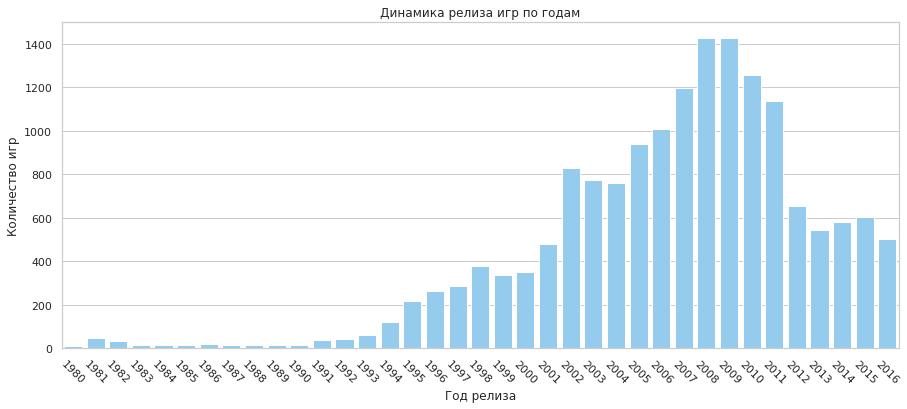

In [1148]:
#  Построим гистограмму
plt.figure(figsize=(15, 6))
with sns.axes_style('whitegrid'):
    sns.countplot(x='year_of_release', data = games_data, color = 'lightskyblue')
    plt.xlabel('Год релиза')
    plt.ylabel('Количество игр')
    plt.title('Динамика релиза игр по годам')
    plt.xticks(rotation= -45 )

In [1149]:
# Оценим основные статистические показатели
games_data.groupby('year_of_release')['name'].count().describe()

count      37.00
mean      444.43
std       451.60
min         9.00
25%        36.00
50%       338.00
75%       762.00
max     1,427.00
Name: name, dtype: float64

### 3.1 Сколько игр выпускалось в разные годы? Важны ли данные за все периоды? Выводы.

До 1995 года рынок компьютерных игр находился в стадии становления в связи с неостаточной вычислительной мощностью устройств, а также недоступностью таких устройств для массового потребителя. Ассортимент ограничивался простейшими аркадами и текстовыми квестами. После выхода первого по настоящему доступного PC на базе процессора Pentium (1993 год) наблюдается резкий рост количества релизов компьютерных игр. Рост продолжается, подогреваемый выходом на рынок игровых консолей, вплоть до 2009 года,  затем следует практически двухкратный спад, возможно связанный с:

- развитием мобильных технологий (часть геймеров утратила интерес к играм, переключившись на "жизнь" в соц.сетях и мессенджерах)
- повышением качества, а соответственно и сроков производства, стоимости разаботки и прочих параметров игровых тайтлов

Тем не менее, на протяжении последних лет количество новых релизов достаточно стабильно (500-600 релизов в год).
Принимая во внимание вышесказанное, а также то, среднее количество релизов за весь срок наблюдений составляет 444 релиза в год - имеет смысл сконцентрироваться на анализе данных начиная с 2002 года.  Но, предположение нужно еще проверить, прооанализировав LTV основных игровых платформ.

### 3.2 Как менялись продажи по платформам? Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 

In [1150]:
games_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_tbd,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,E,8,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,NO RATE,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,E,8.3,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,8,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,NO RATE,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.00,-1.00,NO RATE,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E,8.5,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E,6.6,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.00,8.40,E,8.4,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1.00,-1.00,NO RATE,NaN,28.31


In [1151]:
# Определим самые "прибыльные платформы"
games_data.groupby('platform')['total_sales'].sum().to_frame('total_sales').sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
ps2,"1,233.56"
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Стоит сконцентрировать наше внимание на ТОП-6 основных платформах:
- ps2
- x360
- ps3
- wii
- ds
- ps

так как дальнейший разрыв в выручке все более существенен. 

In [1152]:
# Построим сводную таблицу по прибыльности платформ по годам
sales_by_platform = games_data.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc='sum', fill_value = 0)
sales_by_platform.head(10)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3do,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3ds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
dc,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ds,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
gb,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
gba,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
gc,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
gen,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


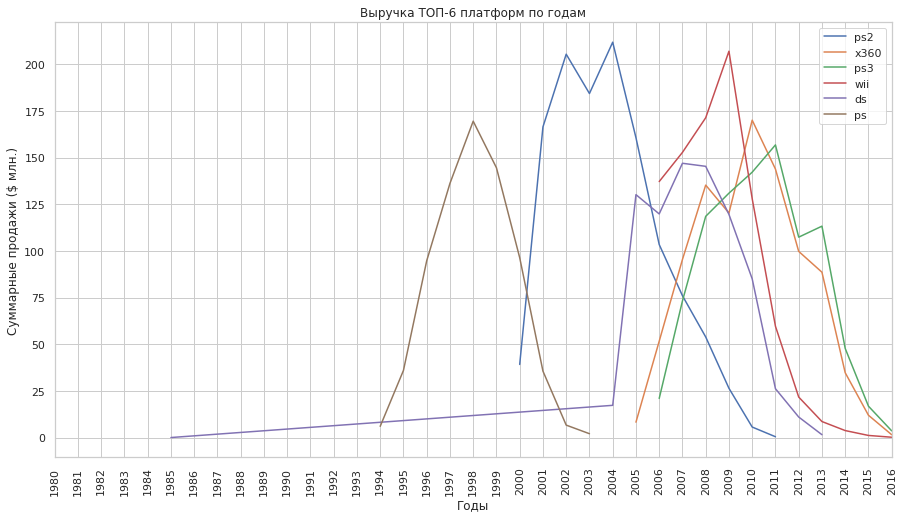

In [1153]:
# Строим график распределения прибыли ТОП-6 платформ по годам
list = ['ps2','x360','ps3','wii','ds','ps']

for i in list:
    games_data.query('platform == @i').groupby('year_of_release')['total_sales'].sum().plot(grid=True, figsize=(15, 8), label = i)
    plt.xlabel("Годы")
    plt.xticks(np.arange(1980,2017,1),rotation= 'vertical')
    plt.ylabel("Суммарные продажи ($ млн.)")
    plt.yticks(np.arange(0,225,25))
    plt.title('Выручка ТОП-6 платформ по годам')
    plt.legend()

Проверим "подозрительную" динамику платформы `ds`, учитывая, что она вышла на рынок только в 2004 году

In [1154]:
games_data.query('platform == "ds" and year_of_release < 2005').sort_values(by = 'year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_tbd,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.00,0.00,0.02,0.00,-1.00,-1.00,NO RATE,NaN,0.02
14087,mahjong taikai,ds,2004,misc,0.00,0.00,0.04,0.00,-1.00,-1.00,NO RATE,NaN,0.04
13463,cocoto kart racer,ds,2004,racing,0.04,0.00,0.00,0.00,-1.00,-1.00,E,tbd,0.04
13095,tennis no oji-sama: 2005 crystal drive,ds,2004,sports,0.00,0.00,0.05,0.00,-1.00,-1.00,NO RATE,NaN,0.05
12367,sprung - a game where everyone scores,ds,2004,adventure,0.06,0.00,0.00,0.00,-1.00,-1.00,NO RATE,NaN,0.06
11517,kenshuui tendo dokuta,ds,2004,simulation,0.00,0.00,0.08,0.00,-1.00,-1.00,NO RATE,NaN,0.08
10940,puyo pop fever (jp sales),ds,2004,puzzle,0.00,0.00,0.09,0.00,-1.00,-1.00,NO RATE,NaN,0.09
10073,ping pals,ds,2004,misc,0.10,0.00,0.00,0.01,28.00,3.90,E,3.9,0.11
9148,mr. driller: drill spirits,ds,2004,puzzle,0.08,0.00,0.05,0.01,70.00,8.90,E,8.9,0.14
8984,tiger woods pga tour,ds,2004,sports,0.13,0.00,0.00,0.01,64.00,7.40,E,7.4,0.14


Наблюдаем один единственный релиз в 1985 году с незначительными продажами в Японии и отсутствием каких бы то ни было рейтингов. В сети о этой игре также нет никакой качественной информации. Далее тишина до 2004 года. Удалим запись как выброс.

In [1155]:
games_data = games_data.drop(index = [15957])

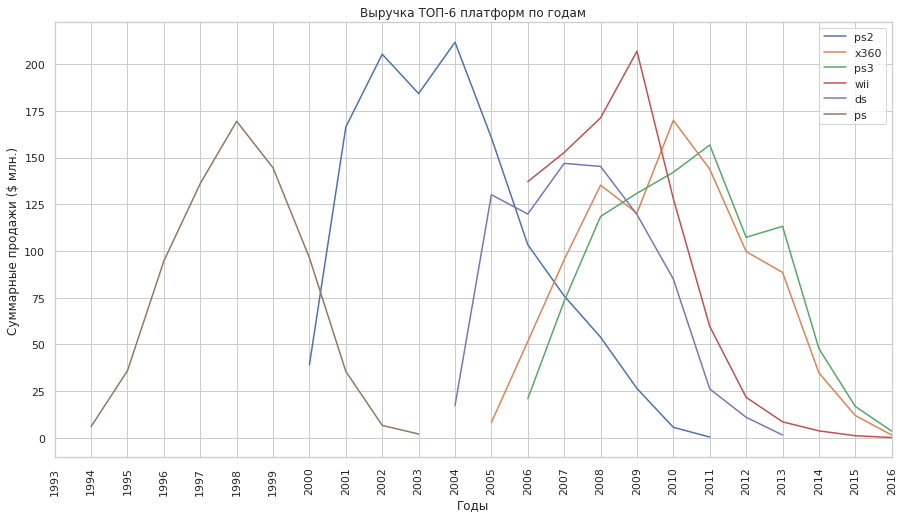

In [1156]:
# Строим график распределения прибыли ТОП-6 платформ по годам
list = ['ps2','x360','ps3','wii','ds','ps']

for i in list:
    games_data.query('platform == @i').groupby('year_of_release')['total_sales'].sum().plot(grid=True, figsize=(15, 8), label = i)
    plt.xlabel("Годы")
    plt.xticks(np.arange(1993,2017,1),rotation= 'vertical')
    plt.ylabel("Суммарные продажи ($ млн.)")
    plt.yticks(np.arange(0,225,25))
    plt.title('Выручка ТОП-6 платформ по годам')
    plt.legend()

Рассчитаем количество лет, когда платформа приносит хоть-какую то выручку и найдем среднюю продолжительность жизни платформы. С учетом того, что доля ТОП-6 платформ, в общерыночной выручке, составляет более 82% - расчеты проведем по ТОП-6 платформам

In [1157]:
for i in list:
    sum = 0
    counter = 0
    plat_life = len(games_data.query('platform == @i and total_sales > 0')['year_of_release'].unique())
    print('LTV платформы', i, ':',plat_life)
    sum += plat_life
    counter += 1
mean_ltv = sum / counter
print('Среднее LTV игровой платформы (годы):', mean_ltv)

LTV платформы ps2 : 12
LTV платформы x360 : 12
LTV платформы ps3 : 11
LTV платформы wii : 11
LTV платформы ds : 10
LTV платформы ps : 10
Среднее LTV игровой платформы (годы): 10.0


### 3.2 Выводы.

- на основании графика видно, что средний жизненный цикл игровой платформы составляет около 10 лет (исключением является только платформа-долгожитель 'ds', но и ее основной "денежный" период составлет те же 9-10 лет)
- пик прибыльности платформы выпадает на 4-5 год "жизни"
- в связи со всем вышеперечисленным, одновременно принимая во внимание ранее проанализированную динамику по релизам игровых тайтлов имеет смысл в дальнейшей работе сконцентрироваться на периоде c 2009 по 2016 годы.
Это позволит нам сконцентрироваться на актуальных этапах LTV наиболее современных платформ, охватить большую часть жизненного цикла средней платформы и учесть динамику игрового рынка последних лет.



### 3.3 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Согласно нашему решению, создадим новый датафрем, ограниченный данными за 2009-2016 год.

In [1158]:
new_data = games_data.query('year_of_release >= 2009').copy(deep=True)
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_tbd,total_sales
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,8,32.77
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.00,8.40,E,8.4,28.32
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.00,6.30,E,6.3,21.82
15,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,80.00,7.40,E,7.4,21.80
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.00,8.20,M,8.2,21.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15 days,pc,2009,adventure,0.00,0.01,0.00,0.00,63.00,5.80,NO RATE,5.8,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1.00,-1.00,NO RATE,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.00,-1.00,NO RATE,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,NO RATE,NaN,0.01


In [1159]:
# Построим сводную таблицу, отражающую суммарную выручку каждой из платформ за период 2009-2016
sales_per_platform = new_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
sales_per_platform

,total_sales
platform,
ps3,718.67
x360,670.70
wii,429.94
ps4,314.14
3ds,257.81
ds,243.29
xone,159.32
pc,138.87
psp,101.83


ТОП- 5 платформ, лидирующих по продажам, со значительным отрывом от остальных - `ps3`, `x360`, `wii`, `ps4`, `3ds`

Далее, посмотрим в динамике по годам.

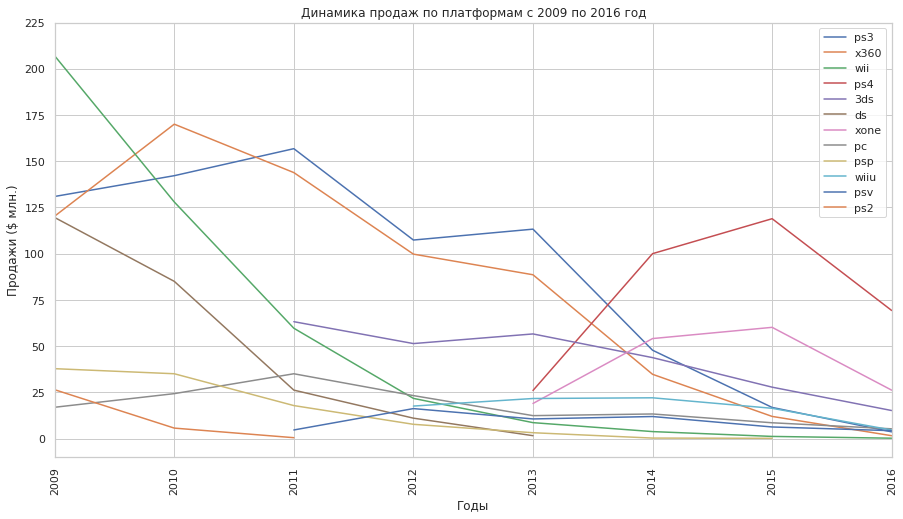

In [1160]:
for i in sales_per_platform.index:
    new_data.query('platform == @i').groupby('year_of_release')['total_sales'].sum().plot(grid=True, figsize=(15, 8), label = i)
    plt.xlabel("Годы")
    plt.xticks(np.arange(2009,2017,1),rotation= 'vertical')
    plt.ylabel("Продажи ($ млн.)")
    plt.yticks(np.arange(0,250,25))
    plt.title('Динамика продаж по платформам с 2009 по 2016 год')
    plt.legend()

### 3.3 Выводы.


- ТОП-3 лидирующие по выручке платформы, за период 2009-2016 - `ps3`, `x360`, `wii`
- стоит также отметить активный спад в выручке у `wii` - сказалось быстрое угасание wow-эффекта от инновационной модели управления в играх и, по большому счету, не очень большое количество действительно интересных игровых проектов
- потенциально прибыльными можно рассматривать `ps4` и `xone` (свежие поколения, активно росли с 2013 года, но даже они уже на спаде)
- все исследуемые платформы уже либо на спаде, либо на зрелом уровне LTV. С 2009 года приходиться отмечать очевидный тренд на снижение объемов рынка.


### 3.4 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Оценим основную статистику по продажам игр.

In [1161]:
new_data.pivot_table(index = 'name', values = 'total_sales', aggfunc = 'sum', fill_value = 0).describe()

,total_sales
count,"4,251.00"
mean,0.75
std,2.30
min,0.01
25%,0.04
50%,0.14
75%,0.49
max,56.58


Text(0.5, 1.0, 'Диаграмма размаха игр по выручке 2009-2016')

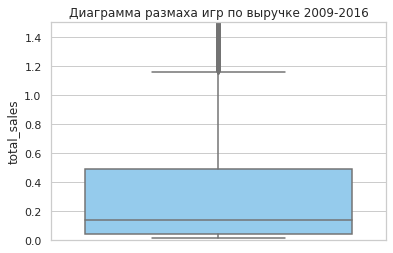

In [1162]:
# Построим диаграмму размаха для игр по выручке
sns.set(style="whitegrid")
plt.ylim(0, 1.5)
sns.boxplot(y="total_sales",
              color="lightskyblue",
              data= new_data.pivot_table(index= 'name', 
              values='total_sales', aggfunc='sum', fill_value=0)
           )
plt.title('Диаграмма размаха игр по выручке 2009-2016')

Подобным же образом оценим ситуацию по платформам

In [1163]:
new_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum', fill_value = 0).describe()

,total_sales
count,12.00
mean,266.92
std,230.87
min,32.49
25%,96.92
50%,201.31
75%,343.09
max,718.67


Построим диаграммы размаха для всех 12 анализируемых платформ

Text(0.5, 1.0, 'Диаграммы размаха отдельных платформ по выручке 2009-2016')

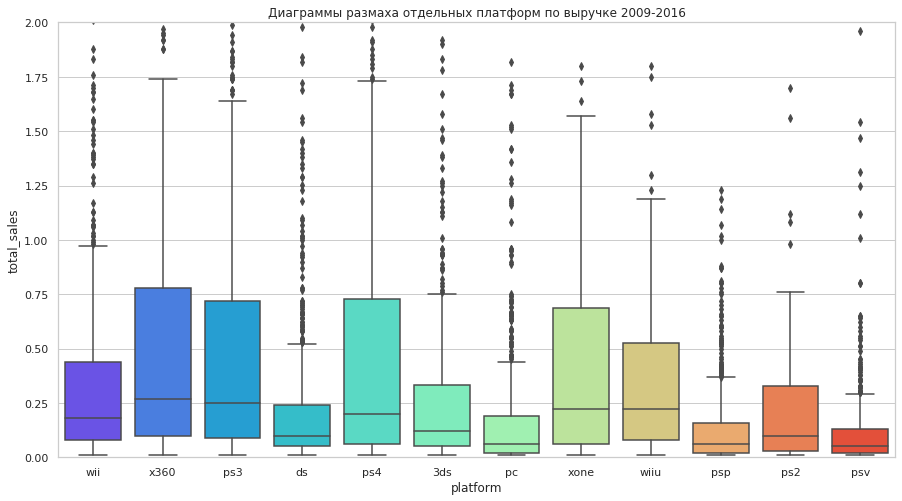

In [1164]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
plt.ylim(0, 2)
sns.boxplot(x="platform", y="total_sales",
              color="b", palette='rainbow',
              data= new_data)
plt.title('Диаграммы размаха отдельных платформ по выручке 2009-2016')

### 3.4 Выводы.

-  выручка от одной игры варьируется в диапазоне от 0,05 до 1,7 млн.долларов. Ощутимое влияние редких, но высокодоходных ААА-тайтлов - среднее значение - 0,75 млн., медиана - 0,14 млн., большой размах (нижний квартиль - 0,04 млн. и верхний - 0,49 млн.) и значительные выбросы до 56,58 млн.долларов.
- выручка по платформам характеризуется значительно меньшим размахом (нижний квартиль - 96,92 млн.долларов и верхний - 343 млн.долларов). Среднее значение - 267 млн., медиана - 201,31 млн.. Также имеются значительные выбросы до 718,6 млн.долларов.
- топовые платформы ('ps3','x360') имеют близкие по объему медианные значения выручки (0,25-0,26 млн.долларов). Платформа 'wii' имеет более низкое медианное значение выручки (0,2 млн.долларов)
- самые современные и именитые, на текущий момент, платформы ('x360','ps3','ps4', 'xone') имеют схожую верхнюю границу, после которой начинаются аномалии (1,65-1,75 млн.долларов). У 'wii' зона выбросов начинается с 0,95 млн. долларов
- у большинства платформ наблюдается:
    - весомый верхний ус (аномалии)
    - значительный разброс по границе верхнего квартиля
- Схожие показатели 'x360','ps3','ps4', 'xone' объясняются тем, что большинство производителей AAA-игр (приносящих значительно большую выручку) ориентировано на высокотехнологичные платформы способные обеспечить достаточный уровень вычислительной мощности, а следовательно и графических возможностей. Платформы от Sony и Microsoft традиционные технологические лидеры игровой индустрии.
- Массовые выбросы аномальных значений, вероятно, объясняются влиянием AAA-тайтлов (чье число невелико относительно общего количества игр), которые выходят редко, но длительное время генерируют основную выручку
- Показатели платформы 'wii' объясняются ее относительной "нишевостью". Она ориентирована на игры с относительно невысокими графическими и вычислительными требованиями, но зато акцентирует внимание на инновационности взаимодействия с игроком (датчики движения). В момент выхода на рынок эти возможности привлекали игроков (новаторов), но эффект новизны быстро проходит, а подкрепить его какими-либо громкими релизами некому, да и конкуренты из Sony и Microsoft не дремлют (внедрили аналогичный функционал в свои платформы).

### 3.5 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Проанализируем платформу `ps3` (как лидера рейтинга по прибыльности в 2009-2016 годах и до сих пор не растерявшую популярность).

In [1165]:
# Создадим новый датафрейм, не забыв исключить проставленные нами идентификационные значения '-1'

ps3_data = new_data.query('platform == "ps3" and critic_score >= 0 and user_score >= 0')[['total_sales','critic_score','user_score']]
ps3_data.head(10)
ps3_data.info()
ps3_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 16 to 16230
Data columns (total 3 columns):
total_sales     570 non-null float64
critic_score    570 non-null float64
user_score      570 non-null float64
dtypes: float64(3)
memory usage: 17.8 KB


,total_sales,critic_score,user_score
count,570.00,570.00,570.00
mean,1.03,71.05,6.78
std,1.82,14.07,1.44
min,0.01,13.00,0.50
25%,0.21,63.00,6.10
50%,0.52,74.00,7.10
75%,1.03,82.00,7.80
max,21.05,97.00,9.10


Рассчитаем коэффициент Пирсона для оценок критиков  и пользователей

In [1166]:
print('PS3_Коэффициент Пирсона "Продажи/Оценки критиков": {:.2f}'.format(ps3_data['total_sales'].corr(ps3_data['critic_score'])))
print('PS3_Коэффициент Пирсона "Продажи/Оценки пользователей": {:.2f}'.format(ps3_data['total_sales'].corr(ps3_data['user_score'])))

PS3_Коэффициент Пирсона "Продажи/Оценки критиков": 0.41
PS3_Коэффициент Пирсона "Продажи/Оценки пользователей": 0.11


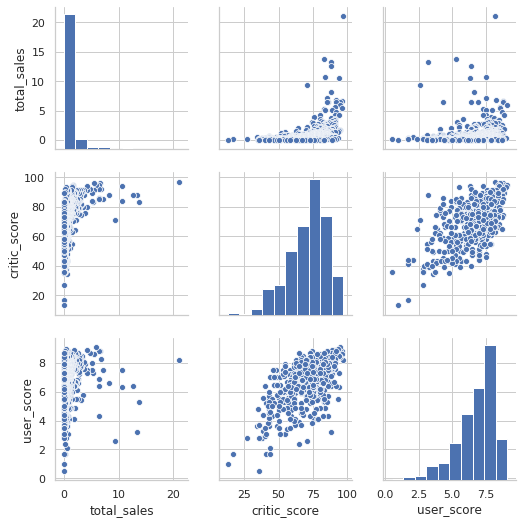

In [1167]:
# Проиллюстрируем отношения между переменными
sns.pairplot(ps3_data)

### 3.5 Выводы.

В рамках платформы `ps3`:

- присутствует слабая корелляция между продажами и оценкой критиков (коэфф.Пирсона = 0.41)
- присутствует очень слабая корелляция между продажами и оценкой пользователей (коэфф.Пирсона = 0.11)
- в рамках оценки игр, для данной платформы, критики чаще, чем пользователи, дают более высокую оценку играм с высокими продажами


### 3.6 Соотнесите выводы с продажами игр на других платформах.

Изучим аналогичные данные по всем остальным платформам вместе.

In [1168]:
# Создадим новый датафрейм, не забыв исключить проставленные нами идентификационные значения '-1'

data_wo_ps3 = new_data.query('platform != "ps3" and critic_score >= 0 and user_score >= 0')[['total_sales','critic_score','user_score']]
data_wo_ps3.head(10)
data_wo_ps3.info()
data_wo_ps3.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2178 entries, 3 to 16705
Data columns (total 3 columns):
total_sales     2178 non-null float64
critic_score    2178 non-null float64
user_score      2178 non-null float64
dtypes: float64(3)
memory usage: 68.1 KB


,total_sales,critic_score,user_score
count,"2,178.00","2,178.00","2,178.00"
mean,0.77,70.72,6.82
std,1.79,13.45,1.46
min,0.01,19.00,0.90
25%,0.11,63.00,6.00
50%,0.28,73.00,7.10
75%,0.72,80.00,7.90
max,32.77,97.00,9.30


Рассчитаем коэффициент Пирсона для оценок критиков  и пользователей

In [1169]:
print('ALL_OTHERS_PLATFORMS_Коэффициент Пирсона "Продажи/Оценки критиков": {:.2f}'.format(data_wo_ps3['total_sales'].corr(data_wo_ps3['critic_score'])))
print('ALL_OTHERS_PLATFORMS_Коэффициент Пирсона "Продажи/Оценки пользователей": {:.2f}'.format(data_wo_ps3['total_sales'].corr(data_wo_ps3['user_score'])))

ALL_OTHERS_PLATFORMS_Коэффициент Пирсона "Продажи/Оценки критиков": 0.26
ALL_OTHERS_PLATFORMS_Коэффициент Пирсона "Продажи/Оценки пользователей": 0.07


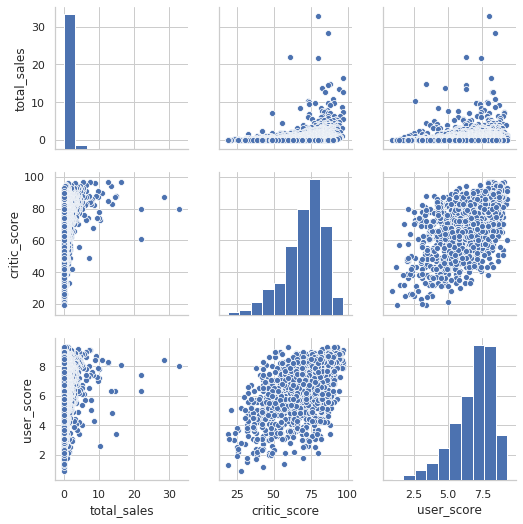

In [1170]:
# Проиллюстрируем отношения между переменными
sns.pairplot(data_wo_ps3)

Оценим также еще 2 платформы из ТОП-3 (`x360`,`wii`), как представителей конкурирующих брендов

#### x360

In [1171]:
# Создадим новый датафрейм, не забыв исключить проставленные нами идентификационные значения '-1'

x360_data = new_data.query('platform == "x360" and critic_score >= 0 and user_score >= 0')[['total_sales','critic_score','user_score']]
x360_data.head(10)
x360_data.info()
x360_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 14 to 16613
Data columns (total 3 columns):
total_sales     544 non-null float64
critic_score    544 non-null float64
user_score      544 non-null float64
dtypes: float64(3)
memory usage: 17.0 KB


,total_sales,critic_score,user_score
count,544.00,544.00,544.00
mean,1.06,68.75,6.65
std,2.06,15.72,1.45
min,0.01,19.00,1.20
25%,0.18,59.00,5.80
50%,0.44,72.00,7.00
75%,1.04,80.25,7.80
max,21.82,97.00,9.00


Рассчитаем коэффициент Пирсона для оценок критиков  и пользователей

In [1172]:
print('X360_Коэффициент Пирсона "Продажи/Оценки критиков": {:.2f}'.format(x360_data['total_sales'].corr(x360_data['critic_score'])))
print('X360_Коэффициент Пирсона "Продажи/Оценки пользователей": {:.2f}'.format(x360_data['total_sales'].corr(x360_data['user_score'])))

X360_Коэффициент Пирсона "Продажи/Оценки критиков": 0.36
X360_Коэффициент Пирсона "Продажи/Оценки пользователей": 0.07


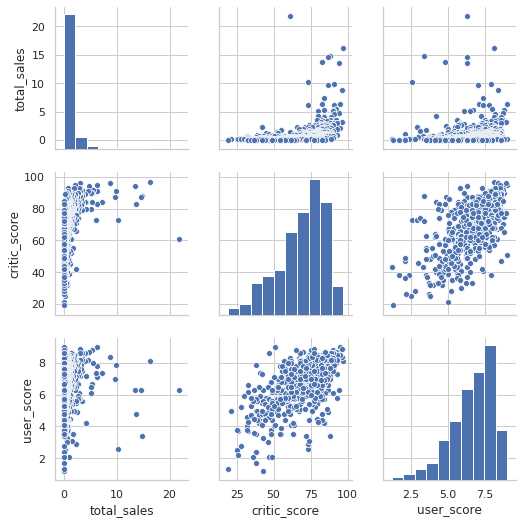

In [1173]:
# Проиллюстрируем отношения между переменными
sns.pairplot(x360_data)

#### wii

In [1174]:
# Создадим новый датафрейм, не забыв исключить проставленные нами идентификационные значения '-1'

wii_data = new_data.query('platform == "wii" and critic_score >= 0 and user_score >= 0')[['total_sales','critic_score','user_score']]
wii_data.head(10)
wii_data.info()
wii_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 3 to 16308
Data columns (total 3 columns):
total_sales     208 non-null float64
critic_score    208 non-null float64
user_score      208 non-null float64
dtypes: float64(3)
memory usage: 6.5 KB


,total_sales,critic_score,user_score
count,208.00,208.00,208.00
mean,1.28,67.85,7.07
std,3.58,13.50,1.49
min,0.01,31.00,1.80
25%,0.22,60.00,6.30
50%,0.44,69.50,7.40
75%,0.89,78.00,8.20
max,32.77,97.00,9.30


Рассчитаем коэффициент Пирсона для оценок критиков  и пользователей

In [1175]:
print('WII_Коэффициент Пирсона "Продажи/Оценки критиков": {:.2f}'.format(wii_data['total_sales'].corr(wii_data['critic_score'])))
print('WII_Коэффициент Пирсона "Продажи/Оценки пользователей": {:.2f}'.format(wii_data['total_sales'].corr(wii_data['user_score'])))

WII_Коэффициент Пирсона "Продажи/Оценки критиков": 0.20
WII_Коэффициент Пирсона "Продажи/Оценки пользователей": 0.13


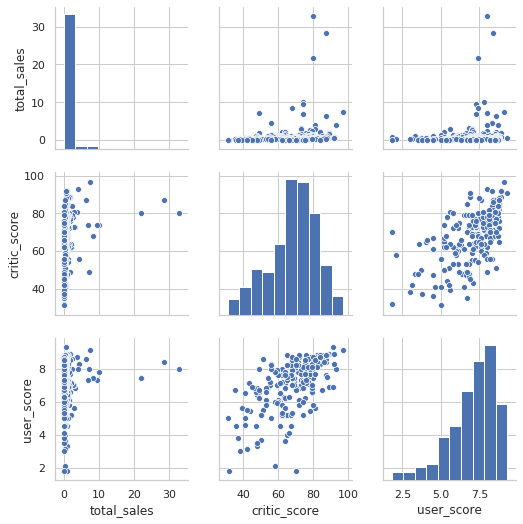

In [1176]:
# Проиллюстрируем отношения между переменными
sns.pairplot(wii_data)

### 3.6 Выводы.

В рамках всех платформ, за исключением `ps3`:

- присутствует очень слабая корелляция между продажами и оценкой критиков (коэфф.Пирсона = 0.26). В рамках платформы `ps3` корреляция сильнее (коэфф.Пирсона = 0.41)
- практически отсутствует корелляция между продажами и оценкой пользователей (коэфф.Пирсона = 0.07). В рамках платформы `ps3` корреляция хоть и сильнее, но отзывы пользователей имеют столь же ничтожное влияние на продажи  (коэфф.Пирсона = 0.11)
- в рамках оценки игр, для платформ, за исключением `ps3`, критики и пользователи чаще единодушны в оценках в зависимости от уровня продаж

Платформа `x360`
- присутствует слабая корелляция между продажами и оценкой критиков (коэфф.Пирсона = 0.36)
- отсутствует корелляция между продажами и оценкой пользователей (коэфф.Пирсона = 0.07)
- в рамках оценки игр, для данной платформы, критики чаще, чем пользователи, дают более высокую оценку играм с высокими продажами

Платформа `wii`
- присутствует очень слабая корелляция между продажами и оценкой критиков (коэфф.Пирсона = 0.20)
- присутствует очень слабая корелляция между продажами и оценкой пользователей (коэфф.Пирсона = 0.13)
- в рамках оценки игр, для данной платформы, пользователи чаще, чем критики, дают более высокую оценку играм с высокими продажами



В принципе, мы видим, что отзывы критиков и пользователей преактически не влияют на продажи. Игроки видимо либо предпочитают местные форумы, где обсуждают игры с относительно узким кругом единомышленнников, либо самостоятельно принимают решение о "ценности" игры, либо учитывают рейтинги и отзывы на сторонних площадках (Steam, GOG, EGS) которые нам недоступны для анализа.

### 3.7 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Оценим количество тайтлов и выручку, в разрезе жанров

In [1177]:
# Выручка
genres_sales = new_data.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
genres_sales

genre
action         810.78
shooter        549.03
sports         465.76
role-playing   362.59
misc           310.37
platform       160.25
racing         156.37
fighting       113.49
simulation     104.67
adventure       81.23
strategy        48.13
puzzle          40.39
Name: total_sales, dtype: float64

Text(0.5, 1.0, 'Выручка по жанрам')

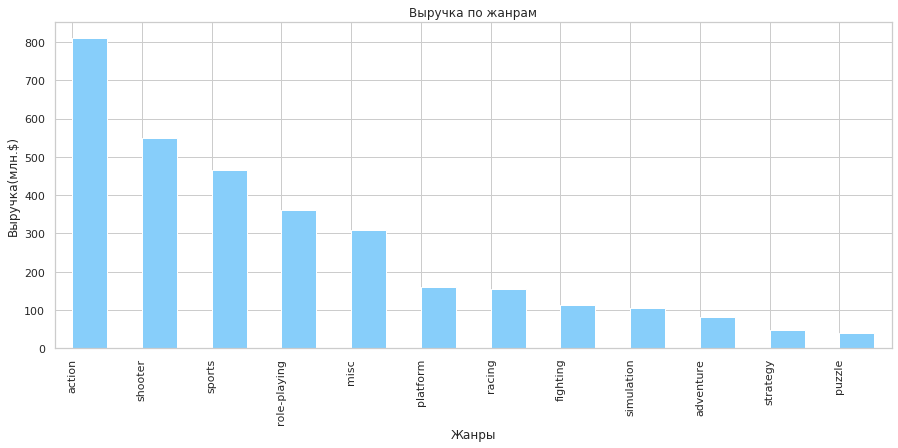

In [1178]:
plt.figure(figsize=(15, 6))
genres_sales.plot(kind = 'bar', color ='lightskyblue', width = 0.5, position = 0)
plt.xlabel('Жанры')
plt.ylabel('Выручка(млн.$)')
plt.title('Выручка по жанрам')

In [1179]:
# Количество уникальных тайтлов
titles_unique = new_data[['genre', 'name']].drop_duplicates()
genres_units = titles_unique.groupby('genre')['name'].count().sort_values(ascending = False)
genres_units

genre
action          948
misc            567
adventure       555
role-playing    507
sports          369
simulation      280
shooter         250
strategy        196
puzzle          171
racing          155
fighting        148
platform        107
Name: name, dtype: int64

Text(0.5, 1.0, 'Количество уникальных игр по жанрам')

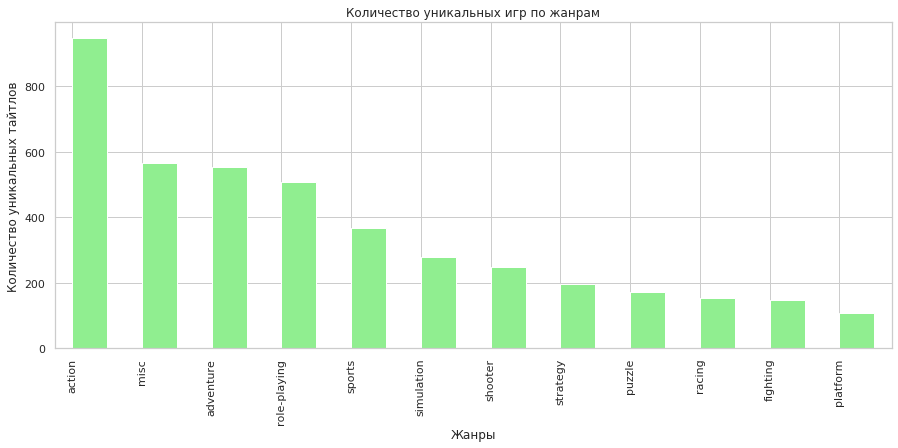

In [1180]:
plt.figure(figsize=(15, 6))
genres_units.plot(kind = 'bar', color ='lightgreen', width = 0.5, position = 0)
plt.xlabel('Жанры')
plt.ylabel('Количество уникальных тайтлов')
plt.title('Количество уникальных игр по жанрам')

### 3.7 Выводы.

- ТОП-5, по выручке, жанров:<br>
    
    - `action` (811 млрд. долларов)
    - `shooter` (549 млрд. долларов)
    - `sports` (466 млн. долларов)
    - `role-playing` (363 млн. долларов)
    - `misc` (310 млн. долларов)
    

- меньше всего выручка у: `adventure`, `strategy`, `puzzle`

    
- ТОП-5, по количеству уникальных игр, жанров:<br>
    
    - `action` (948 уникальных игр)
    - `misc` (567 уникальных игр)
    - `adventure ` (555 уникальных игр)
    - `role-playing` (507 уникальных игр)
    - `sports ` (369  уникальных игр)
    
    
- меньше всего игр в жанрах: `racing`, `fighting`, `platform`

## Шаг 4. Составьте портрет пользователя каждого региона.

Определите для пользователя каждого региона (NA, EU, JP):

- cамые популярные платформы (топ-5). Опишите различия в долях продаж.
- cамые популярные жанры (топ-5). Поясните разницу.
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### 4.1 Cамые популярные платформы (топ-5).

In [1181]:
# Создаем функцию для построения необходимых сводных таблиц
def region_top5(column, region):
    df = new_data.pivot_table( index = column, values = region, aggfunc = 'sum').sort_values(region, ascending=False).head(5)
    df.name = region
    return df

In [1182]:
# Создаем функцию для построения необходимых графиков по сводным таблицам
def region_top5_graph(df,ax, ylim):
    color_dict = {'na_sales':'lightskyblue', 'eu_sales':'lightgreen','jp_sales':'lightcoral'}
    graph = df.plot(kind='bar', ax=axes[ax], title = df.name, color = color_dict[df.name], fontsize = 15)
    graph.title.set_size(30)
    graph.legend(prop={'size':20})
    graph.axes.set_ylim(0, ylim)

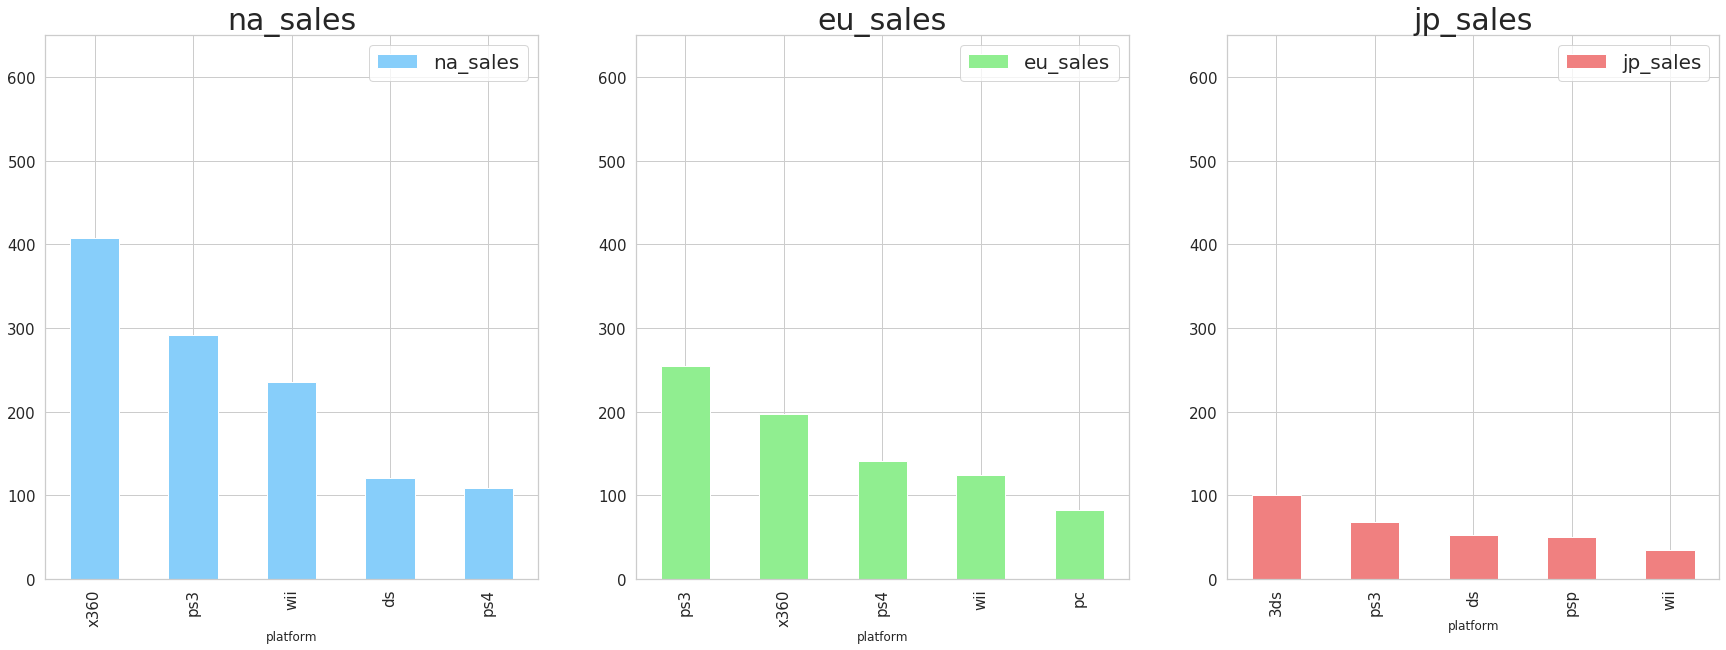

In [1183]:
# Строим графики по платформам
fig, axes = plt.subplots(1, 3, figsize=(30,10))

region_top5_graph(region_top5('platform','na_sales'), 0, 650)
region_top5_graph(region_top5('platform','eu_sales'), 1, 650)
region_top5_graph(region_top5('platform','jp_sales'), 2, 650)

#### 4.1 Cамые популярные платформы (топ-5). Выводы.

- Америка:
    - ТОП-5 платформ: `x360`, `ps3`, `wii`, `ds`, `ps4`
    
- Европа:
    - ТОП-5 платформ: `ps3`, `x360`, `ps4`, `wii`, `pc`
    
- Япония:
    - ТОП-5 платформ: `3ds`, `ps3`, `ds`, `psp`, `wii`
    
- есть только 2 платформы, которые находятся в числе лидеров в каждом из регионов: `wii` и `ps3`
- японские предпочтения значительно отличаются от Европы и Америки. Наиболее популярны платформы отечественных производителей, что вполне объяснимо, хотя бы тем, что Sony и Nintendo выпускают массу контента, ориентированнного только на японскую аудиторию. Но по денежным объемам игровой рынок Японии в 3 раза меньше американского и в 1,5 раза менше европейского.
- в Америке, в единоличном зачете закономерно лидирует платформа от Microsoft, но конкуренты из Sony и Nintendo идут практически вровень, если сложить продажи их собственных платформ вместе. Америка - самый денежный регион игрового рынка.
- европейский рынок наиболее демократичен с точки зрения "национальностей" платформ. На лидирующих позициях платформы всех ведущих производителей. Но в "командном зачете" все не так радужно. Японские платформы определенно доминирируют.

#### 4.2 Cамые популярные жанры (топ-5). 

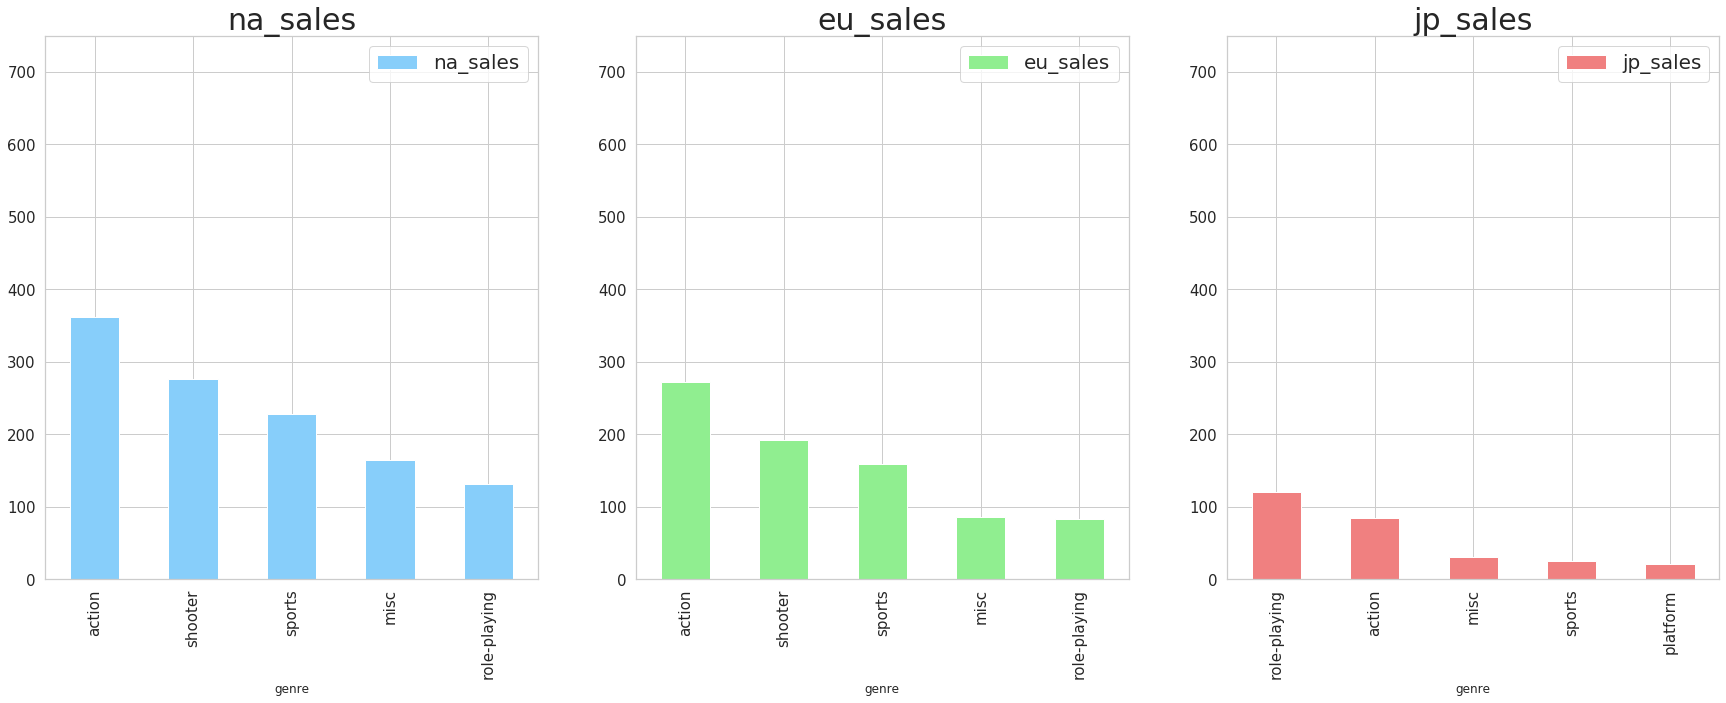

In [1184]:
# Строим графики по жанрам
fig, axes = plt.subplots(1, 3, figsize=(30,10))

region_top5_graph(region_top5('genre','na_sales'), 0, 750)
region_top5_graph(region_top5('genre','eu_sales'), 1, 750)
region_top5_graph(region_top5('genre','jp_sales'), 2, 750)

#### 4.2  Выводы.

- предпочтения в жанрах, у европейцев и американцев, достаточно схожи - лидируют экшены, спортивные игры, шутеры
- в Европе в чило лидеров вошли гонки
- японцы снова отличились - наибольший интерес проявляют к rpg (куда же без японской классики Final Fantasy...) и не забывают про платформеры и misc (любимая ниша Nintendo). Хотя и в ценимые остальным миром экшены и спортивные игры тоже активно играют.

#### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [1185]:
# Создадим новый датафрейм для анализа корреляций рейтинга и региональных продаж
esrb_data = new_data.query('rating != "NO RATE"')[['na_sales', 'eu_sales', 'jp_sales','rating']].copy(deep=True)
esrb_data

,na_sales,eu_sales,jp_sales,rating
3,15.61,10.93,3.28,E
8,14.44,6.94,4.70,E
14,15.00,4.89,0.24,E
15,9.01,8.49,2.53,E
16,7.02,9.09,0.98,M
...,...,...,...,...
16678,0.01,0.00,0.00,T
16688,0.01,0.00,0.00,T
16692,0.00,0.01,0.00,M
16696,0.01,0.00,0.00,T


In [1186]:
# Чтобы оценить корреляцию, превратим категориальные значения рейтинга ESRB в числовые (как нижний порог возраста)
esrb_dict ={'E':0, 'M':17, 'T':13, 'E10+':10, 'AO':18, 'EC':3, 'RP':100}

# Добавим числовые идентификаторы рейтинга в новый столбец
esrb_data['esrb_age'] = esrb_data['rating'].map(esrb_dict)
esrb_data

,na_sales,eu_sales,jp_sales,rating,esrb_age
3,15.61,10.93,3.28,E,0
8,14.44,6.94,4.70,E,0
14,15.00,4.89,0.24,E,0
15,9.01,8.49,2.53,E,0
16,7.02,9.09,0.98,M,17
...,...,...,...,...,...
16678,0.01,0.00,0.00,T,13
16688,0.01,0.00,0.00,T,13
16692,0.00,0.01,0.00,M,17
16696,0.01,0.00,0.00,T,13


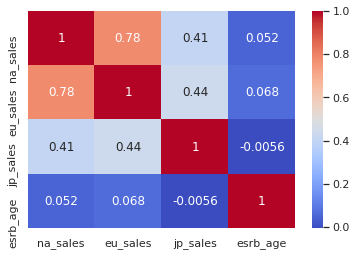

In [1187]:
# Построим тепловую карту корреляций
sns.heatmap(esrb_data.corr(),cmap='coolwarm',annot=True)

#### 4.3 Выводы.

- как показывает анализ корреляции (проведенный с помощью замены категориальной переменной `rating` на ее численные аналоги) - нет связи между возрастной категорией(рейтинг ESRB) и объемом выручки в каком либо регионе. Коэффициент Пирсона находится в диапазоне от -0,006 до 0,052.

## Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.




Для проверки вышеописанных гипотез нам необходимо проверить две "двусторонних" гипотезы относительно равенства средних двух генеральных совокупностей.

#### 5.1 Гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

`"нулевая" гипотеза` - cредние пользовательские рейтинги платформ Xbox One и PC равны

`альтернативная гипотеза` - cредние пользовательские рейтинги платформ Xbox One и PC отличаются

In [1188]:
# Подготовим таблицы для расчетов, исключив идетификационные значения пользовательского рейтинга '-1'
xone_user_score = new_data.query('user_score >= 0 and platform == "xone"')[['user_score']]
pc_user_score = new_data.query('user_score >= 0 and platform == "pc"')[['user_score']]

# зададим стандартный уровень статистической значимости (5%)
alpha = .05

result = st.ttest_ind(xone_user_score, pc_user_score)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.32258313]
Не получилось отвергнуть нулевую гипотезу


#### 5.1  Выводы.

"Нулевая" гипотеза, о том, что cредние пользовательские рейтинги платформ Xbox One и PC равны, не отвергнута.  Средние пользовательские рейтинги платформ Xbox One и PC равны.

#### 5.2 Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные".

`"нулевая" гипотеза` - cредние пользовательские рейтинги жанров Action и Sports равны

`альтернативная гипотеза` - cредние пользовательские рейтинги жанров Action и Sports отличаются

In [1189]:
# Подготовим таблицы для расчетов, исключив идетификационные значения пользовательского рейтинга '-1'
action_user_score = new_data.query('user_score >= 0 and genre == "action"')[['user_score']]
sports_user_score = new_data.query('user_score >= 0 and genre == "sports"')[['user_score']]

# зададим стандартный уровень статистической значимости (5%)
alpha = .05

result = st.ttest_ind(sports_user_score, action_user_score)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [1.05167349e-15]
Отвергаем нулевую гипотезу


#### 5.2  Выводы.

"Нулевая" гипотеза, о том, что cредние пользовательские рейтинги жанров Action и Sports равны, отвергнута. Cредние пользовательские рейтинги жанров Action и Sports отличаются.

## Шаг 6. Общий вывод.

#### Цель исследования

Установить определяющие успех компьютерной игры закономерности, подготовить предложения по потенциально популярному продукту и планированию рекламных кампаний

#### Общая информация о данных

- в исходном датафрейме 16 715 записей
- доступна информация за 37 лет, с 1980 по 2016 гг
- 4 географических региона: США, Европа, Япония, Прочие регионы
- около 40% записей не содержат данных об оценках критиков и пользователей

#### Исследовательский анализ данных. Выводы.

- в среднем за год выпускается 444 игры
- средний срок жизни платформы составляет 10 лет
- пик выручки наступает на 4-5 год жизни платформы
- для дальнейшего анализа данных был выбран период с 2009 по 2016 год, как период высокой активности жизненного цикла современных игровых платформ и, как следствие, имеющий максимальное и достаточное количество полезных данных
- наиболее прибыльными являются платформы: `ps2`, `x360`, `ps3`, `wii`, `ds`
- привлекательными, с точки зрения потенциала, могут считаться платформы: `ps4` и `xone` (как находящиеся на пике своего LTV)
 - выручка от одной игры варьируется в диапазоне от 0,05 до 1,18 млн.долларов. Ощутимое влияние редких, но высокодоходных ААА-тайтлов - среднее значение - 0,75 млн., медиана - 0,14 млн., большой размах (нижний квартиль - 0,04 млн. и верхний - 0,49 млн.) и значительные выбросы значений выручки до 56,5 млн.долларов.
- выручка по платформам характеризуется значительно меньшим размахом (нижний квартиль - 97 млн.долларов и верхний - 343 млн.долларов). Среднее значение - 267 млн., медиана - 201 млн. Также имеются значительные выбросы значений выручки до более чем 718 млн.долларов.
- не обнаружено значимой корреляции между объемом выручки и отзывами ни критиков, ни пользователей 
- наиболее прибыльными жанрами игр, за исследуемый период, являются:
    - `action` (811 млрд. долларов)
    - `shooter` (549 млрд. долларов)
    - `sports` (466 млн. долларов)
    - `role-playing` (363 млн. долларов)
    - `misc` (310 млн. долларов)
- больше всего игр, за исследуемый период, выпускалось в жанрах:
    - `action` (948 уникальных игр)
    - `misc` (567 уникальных игр)
    - `adventure ` (555 уникальных игр)
    - `role-playing` (507 уникальных игр)
    - `sports ` (369  уникальных игр)
    
#### Портрет пользователя каждого региона. Выводы.

- ТОП-5 платформ по выручке:
    - Америка: `x360`, `ps3`, `wii`, `ds`, `ps4`
    - Европа: `ps3`, `x360`, `ps4`, `wii`, `pc`
    - Япония: `3ds`, `ps3`, `ds`, `psp`, `wii`
- только 2 платформы, которые находятся в числе лидеров в каждом из регионов: `wii` и `ps3`
- Америка - самый денежный регион игрового рынка. Европа в 2 раза меньше. Япония в 1,5 раза меньше Европы.
- японские платформы от Sony и Nuntendо, в совокупности значительно опрережают все остальные платформы по выручке
- предпочтения в жанрах, у европейцев и американцев, одинаковы - лидируют `экшены`, `спортивные игры`, `шутеры`, `misc` и `rpg`
- японцы наибольший интерес проявляют к жанрам `rpg` и `action`. Из особенностей - `platform` (основная ниша Nintendo). Японский потребитель чаще всего отдает предпочтение отечественным платформам (Sony, Nintendo).
- значимой корреляции между возратным рейтингом ESRB и объемами продаж не обнаружено

#### Результат проверки гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

- "нулевая" гипотеза, о том, что cредние пользовательские рейтинги платформ Xbox One и PC равны, не отвергнута. Средние пользовательские рейтинги платформ Xbox One и PC равны.

#### Результат проверки гипотезы: "Средние пользовательские рейтинги жанров Action и Sports разные"

- "нулевая" гипотеза, о том, что cредние пользовательские рейтинги жанров Action и Sports равны, отвергнута. Cредние пользовательские рейтинги жанров Action и Sports отличаются.

#### Рекомендации бизнесу:

- основное внимание в ассортименте уделить играм в жанрах `action`, `shooter`, `sports` и `role-playing` в связи с их прибылью и популяностью
- учитывать особую региональную специфику японского рынка, имеющего особенности как по представленности игровых платформ, так и по популярности специфичных жанров
- ассортиментная политика должна учитывать только самые высокие оценки критиков и пользователей, так как средние и низкие оценки гораздо слабее связаны с уровнем потенциальных продаж игры
- стоит рассмотреть возможность кроссмаркетинговой активности с представителями вендоров, специализирующихся на продажах платформ `ps4` и `xone` (в связи с их активной фазой LTV)




#### Спасибо за внимание!